In [65]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [66]:
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
pd.set_option('display.max_columns', None)
country_data_df.head(1)


,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,103187.0,NaN,NaN,NaN,NaN,NaN,NaN,88132.0167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN


In [67]:
Total_MSW = country_data_df[['country_name', 
                       'income_id', 
                       'gdp', 
                       'population_population_number_of_people', 
                       'total_msw_total_msw_generated_tons_year']]
Total_MSW.fillna(0).set_index('country_name').head(3)

,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
country_name,,,,
Aruba,HIC,0.000000e+00,103187.0,8.813202e+04
Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06
Angola,LMC,1.030423e+11,25096150.0,4.213644e+06


In [68]:
# rate of MSW generation per day = total_msw_total_msw_generated_tons_year / 365

#MSW['rate_per_day_kgs'] = MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]


<ipython-input-68-5a3af2df02d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
<ipython-input-68-5a3af2df02d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]


In [69]:
#Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person'].rank(ascending = True)
Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person']
Total_MSW

<ipython-input-69-84ab0299c7d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person']


,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
0,Aruba,HIC,NaN,1.031870e+05,8.813202e+04,241.457580,0.854100,0.854100
1,Afghanistan,LIC,2.141361e+10,3.465603e+07,5.628525e+06,15420.617452,0.162411,0.162411
2,Angola,LMC,1.030423e+11,2.509615e+07,4.213644e+06,11544.229000,0.167900,0.167900
3,Albania,UMC,1.347108e+10,2.880703e+06,1.142964e+06,3131.408219,0.396766,0.396766
4,Andorra,HIC,3.319880e+09,8.243100e+04,4.300000e+04,117.808219,0.521648,0.521648
5,United Arab Emirates,HIC,3.842225e+11,9.269612e+06,5.413453e+06,14831.379200,0.584000,0.584000
6,Argentina,HIC,4.475178e+11,4.298152e+07,1.791055e+07,49070.000000,0.416704,0.416704
7,Armenia,UMC,1.150200e+10,2.906220e+06,4.928000e+05,1350.136986,0.169567,0.169567
8,American Samoa,UMC,5.345551e+08,5.559900e+04,1.898949e+04,52.026000,0.341544,0.341544
9,Antigua and Barbuda,HIC,1.344374e+09,9.677700e+04,3.058500e+04,83.794521,0.316036,0.316036


In [70]:
df_world = Total_MSW
df_world.fillna(0)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
0,Aruba,HIC,0.000000e+00,1.031870e+05,8.813202e+04,241.457580,0.854100,0.854100
1,Afghanistan,LIC,2.141361e+10,3.465603e+07,5.628525e+06,15420.617452,0.162411,0.162411
2,Angola,LMC,1.030423e+11,2.509615e+07,4.213644e+06,11544.229000,0.167900,0.167900
3,Albania,UMC,1.347108e+10,2.880703e+06,1.142964e+06,3131.408219,0.396766,0.396766
4,Andorra,HIC,3.319880e+09,8.243100e+04,4.300000e+04,117.808219,0.521648,0.521648
5,United Arab Emirates,HIC,3.842225e+11,9.269612e+06,5.413453e+06,14831.379200,0.584000,0.584000
6,Argentina,HIC,4.475178e+11,4.298152e+07,1.791055e+07,49070.000000,0.416704,0.416704
7,Armenia,UMC,1.150200e+10,2.906220e+06,4.928000e+05,1350.136986,0.169567,0.169567
8,American Samoa,UMC,5.345551e+08,5.559900e+04,1.898949e+04,52.026000,0.341544,0.341544
9,Antigua and Barbuda,HIC,1.344374e+09,9.677700e+04,3.058500e+04,83.794521,0.316036,0.316036


In [83]:
Treatment_LIC = df_world.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
#df1 = Treatment_LIC.sum(axis=0)
df_LIC= pd.DataFrame(Treatment_LIC)
df_LIC.head(3)
i = df_LIC[(df_LIC.gdp == 0.000000e+00)].index
LIC_rank = df_LIC.drop(i)
LIC_rank

,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
country_name,,,,,,,
Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06,15420.617452,0.162411,0.162411
Burundi,LIC,2.297241e+09,6741569.0,1.872016e+06,5128.810959,0.277683,0.277683
Benin,LIC,9.102277e+09,5521763.0,6.859360e+05,1879.276740,0.124224,0.124224
Burkina Faso,LIC,1.238052e+10,18110624.0,2.575251e+06,7055.482493,0.142196,0.142196
Central African Republic,LIC,1.496562e+09,4515392.0,1.105983e+06,3030.090411,0.244936,0.244936
"Congo, Dem. Rep.",LIC,3.209000e+10,78736153.0,1.438523e+07,39411.578137,0.182702,0.182702
Comoros,LIC,6.113708e+08,777424.0,9.101300e+04,249.350685,0.117070,0.117070
Ethiopia,LIC,5.234723e+10,99873033.0,6.532787e+06,17898.046493,0.065411,0.065411
Guinea,LIC,9.667718e+09,8132552.0,5.969110e+05,1635.372603,0.073398,0.073398


<IPython.core.display.Javascript object>


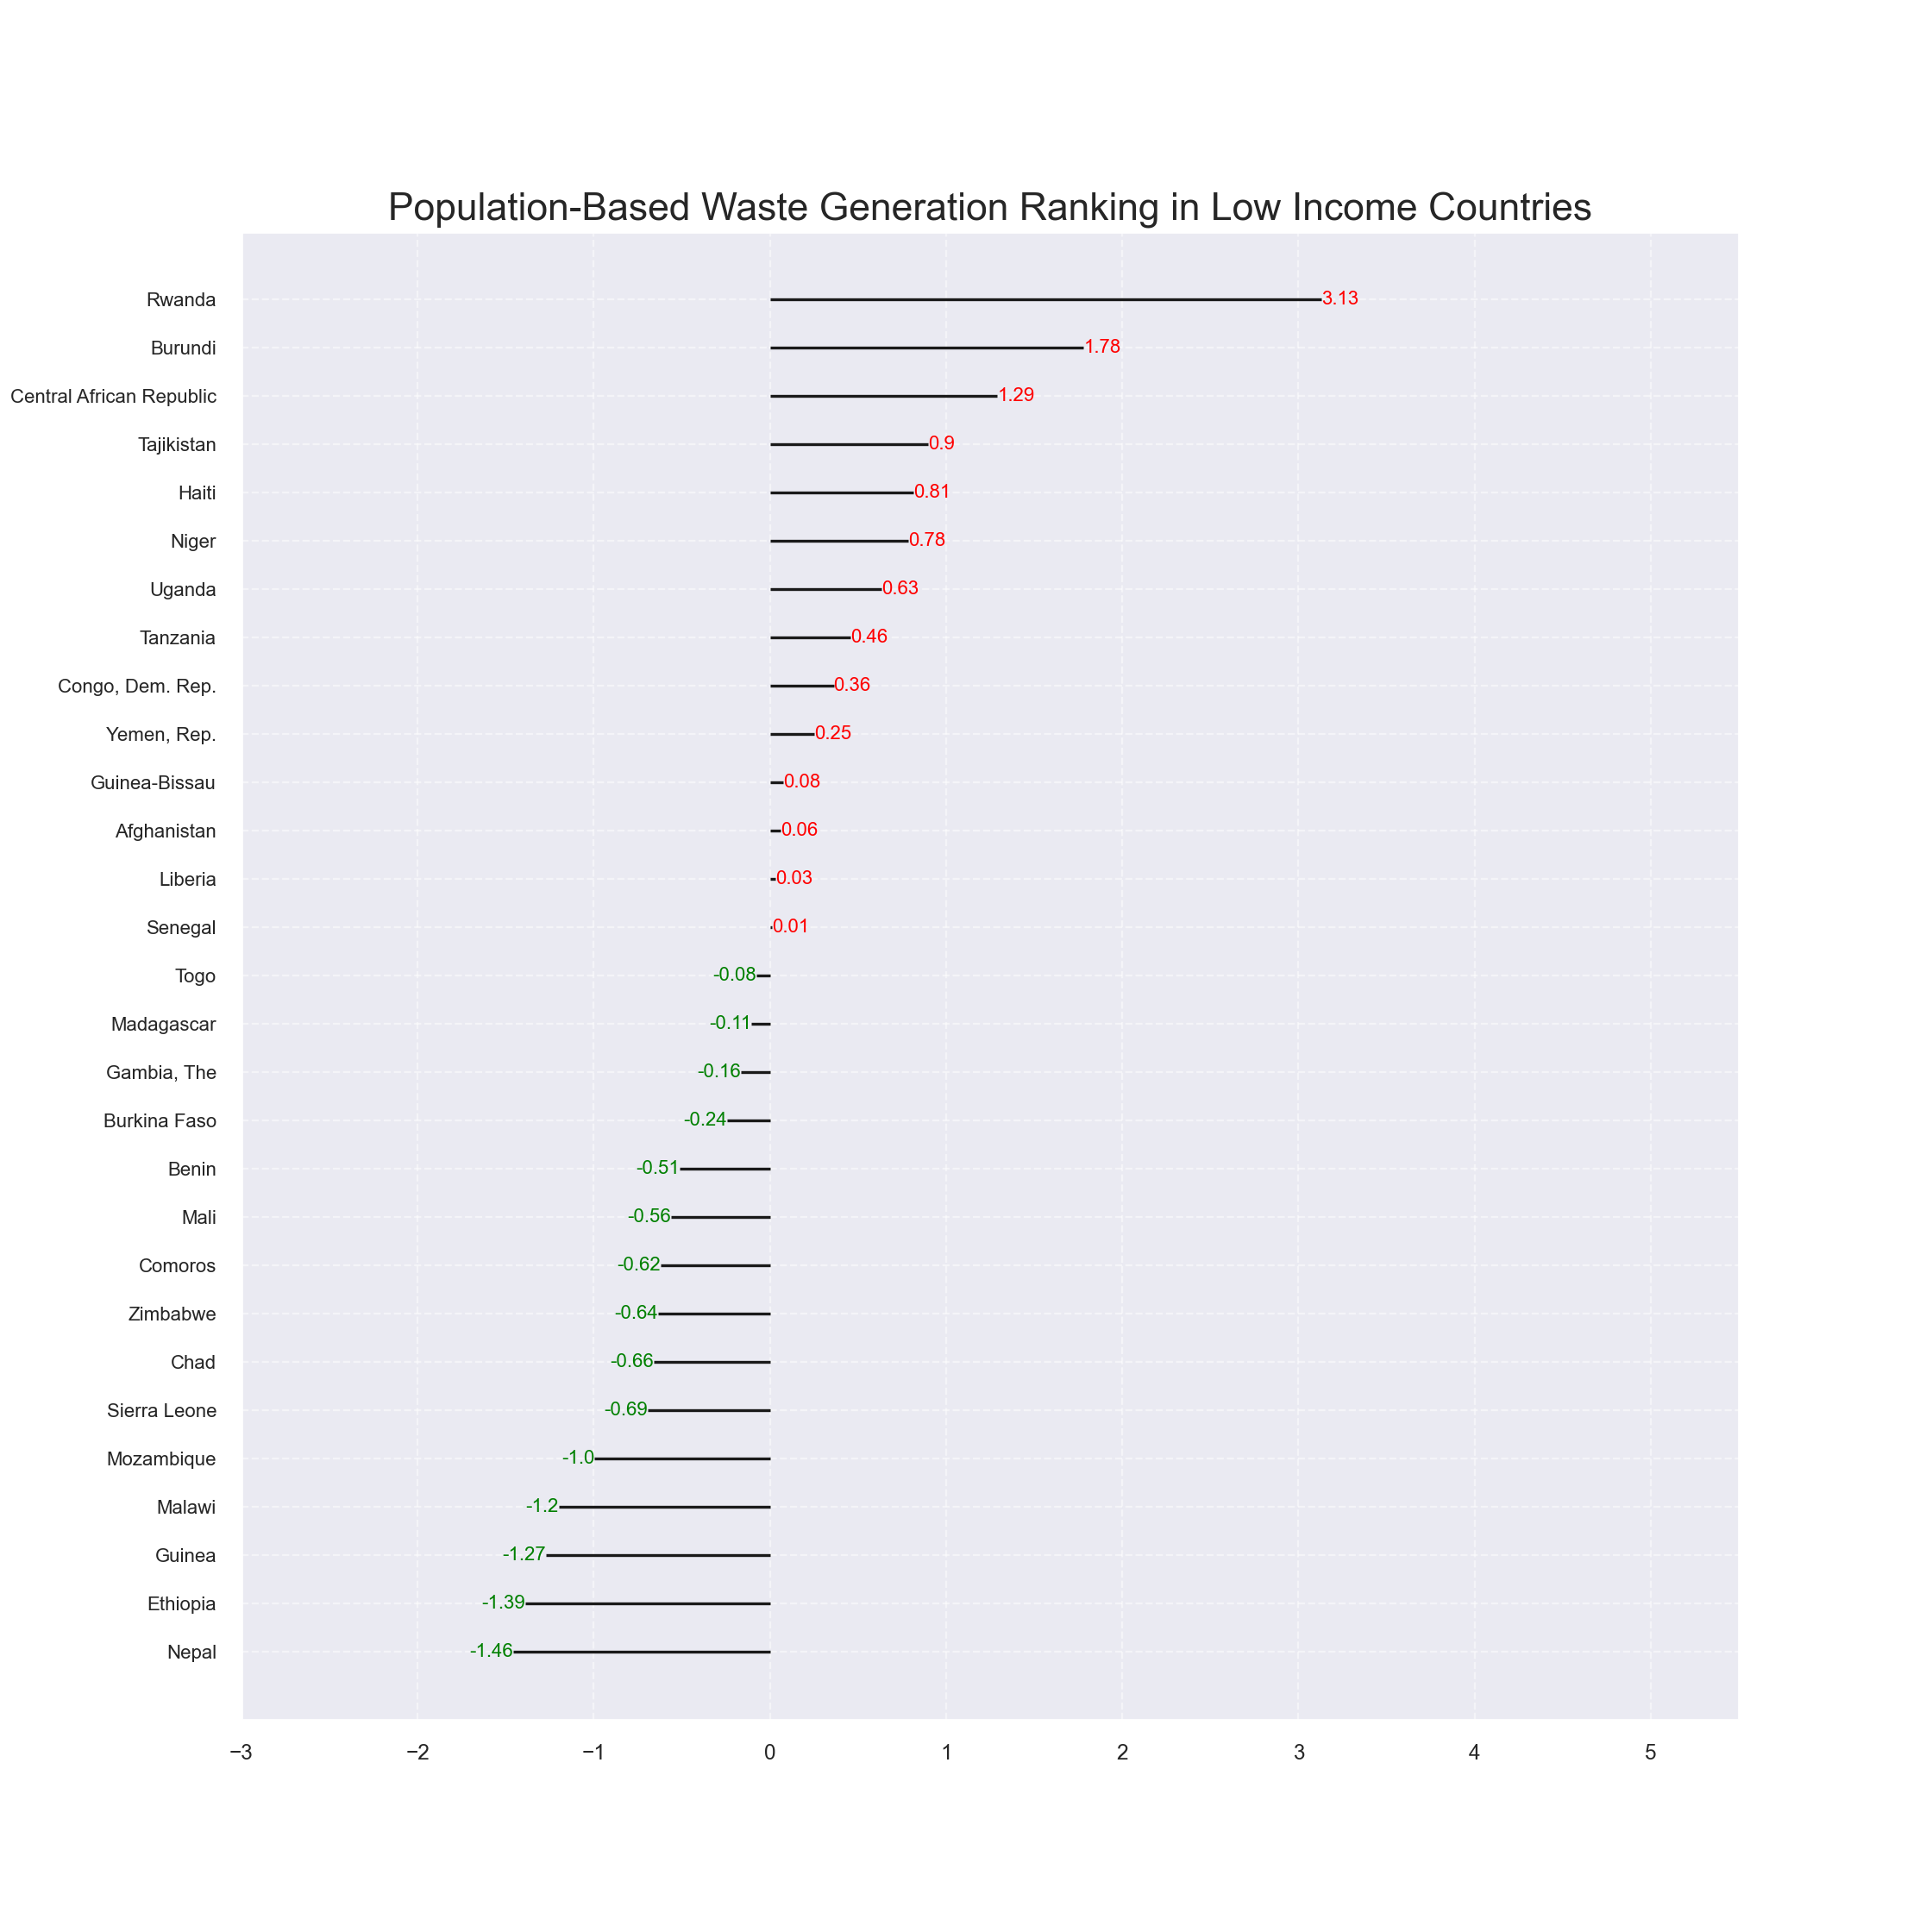

In [105]:
x = LIC_rank.loc[:, ['msw_per_day_per_person']]
LIC_rank['mpg_z'] = (x - x.mean())/x.std()
LIC_rank['colors'] = ['green' if x < 0.5 else 'red' for x in LIC_rank['mpg_z']]
LIC_rank.sort_values('mpg_z', inplace=True)
#LIC_rank.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=LIC_rank.country_name, xmin=0, xmax=LIC_rank.mpg_z)
for x, y, tex in zip(LIC_rank.mpg_z, LIC_rank.index, LIC_rank.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'green' if x < 0 else 'red', 'size':10})
    

# Decorations    
plt.yticks(LIC_rank.country_name, fontsize=10)
plt.title('Population-Based Waste Generation Ranking in Low Income Countries', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-3.0, 5.5)
plt.show()

In [102]:
Treatment_LMC = df_world.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
#df1 = Treatment_LIC.sum(axis=0)
df_LMC= pd.DataFrame(Treatment_LMC)
df_LMC
i = df_LMC[(df_LMC.gdp == 0.000000e+00)].index
LMC_rank = df_LMC.drop(i)
LMC_rank



,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
country_name,,,,,,,
Angola,LMC,1.030423e+11,2.509615e+07,4.213644e+06,11544.229000,0.167900,0.167900
Bangladesh,LMC,1.677713e+11,1.557271e+08,1.477850e+07,40489.033781,0.094900,0.094900
Bolivia,LMC,2.675834e+10,1.072470e+07,2.219052e+06,6079.594521,0.206910,0.206910
Bhutan,LMC,2.234759e+09,6.869580e+05,1.113141e+05,304.970000,0.162039,0.162039
Côte d’Ivoire,LMC,3.679647e+10,2.040133e+07,4.440814e+06,12166.614438,0.217673,0.217673
Cameroon,LMC,3.505198e+10,2.165572e+07,3.270617e+06,8960.593397,0.151028,0.151028
"Congo, Rep.",LMC,1.420569e+10,2.648507e+06,4.512000e+05,1236.164384,0.170360,0.170360
Cabo Verde,LMC,1.860166e+09,5.139790e+05,1.325550e+05,363.164384,0.257900,0.257900
"Egypt, Arab Rep.",LMC,2.608163e+11,8.781326e+07,2.100000e+07,57534.246575,0.239144,0.239144


<IPython.core.display.Javascript object>


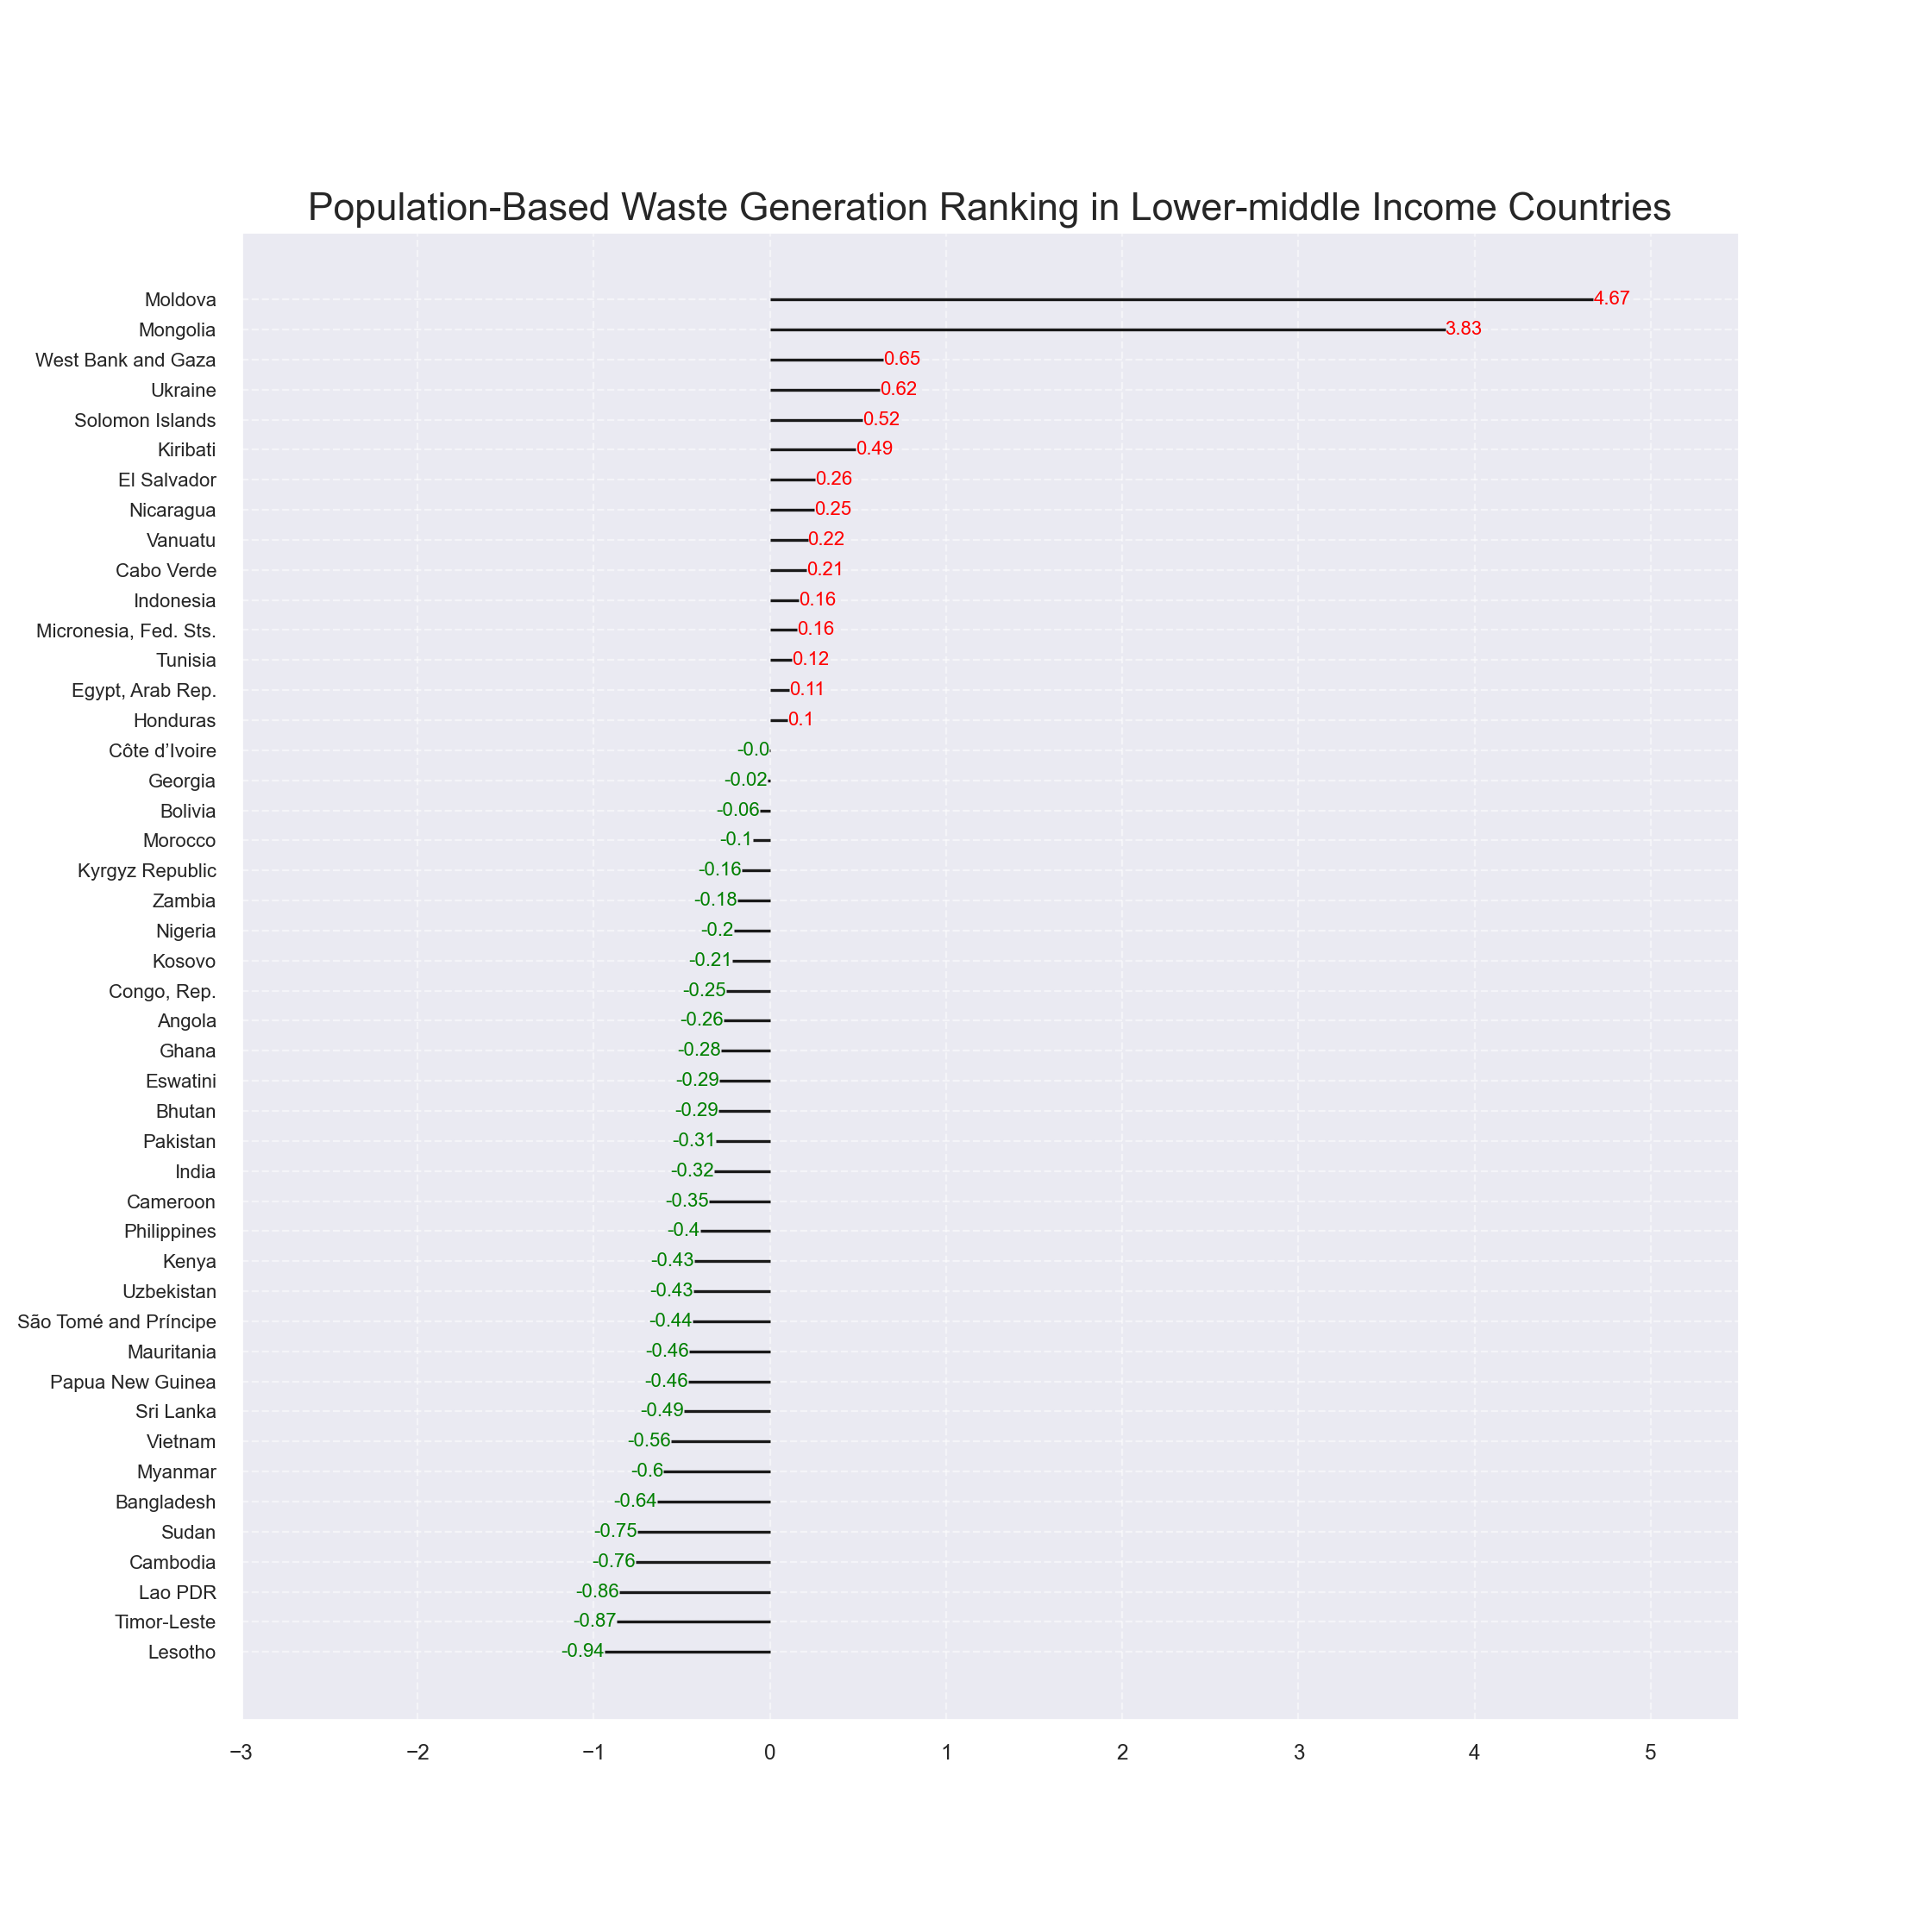

In [106]:
x = LMC_rank.loc[:, ['msw_per_day_per_person']]
LMC_rank['mpg_z'] = (x - x.mean())/x.std()
LMC_rank['colors'] = ['green' if x < 0.5 else 'red' for x in LMC_rank['mpg_z']]
LMC_rank.sort_values('mpg_z', inplace=True)
LMC_rank.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=LMC_rank.country_name, xmin=0, xmax=LMC_rank.mpg_z)
for x, y, tex in zip(LMC_rank.mpg_z, LMC_rank.index, LMC_rank.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'green' if x < 0 else 'red', 'size':10})
    

# Decorations    
plt.yticks(LMC_rank.country_name, fontsize=10)
plt.title('Population-Based Waste Generation Ranking in Lower-middle Income Countries', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-3.0, 5.5)
plt.show()

In [104]:
Treatment_UMC = df_world.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
#df1 = Treatment_LIC.sum(axis=0)
df_UMC= pd.DataFrame(Treatment_UMC)
df_UMC
i = df_UMC[(df_UMC.gdp == 0.000000e+00)].index
UMC_rank = df_UMC.drop(i)
UMC_rank



,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
country_name,,,,,,,
Albania,UMC,1.347108e+10,2.880703e+06,1.142964e+06,3131.408219,0.396766,0.396766
Armenia,UMC,1.150200e+10,2.906220e+06,4.928000e+05,1350.136986,0.169567,0.169567
American Samoa,UMC,5.345551e+08,5.559900e+04,1.898949e+04,52.026000,0.341544,0.341544
Azerbaijan,UMC,5.719553e+10,9.649341e+06,2.930349e+06,8028.353425,0.303684,0.303684
Bulgaria,UMC,5.679241e+10,7.177991e+06,3.011000e+06,8249.315068,0.419477,0.419477
Bosnia and Herzegovina,UMC,1.892970e+10,3.535961e+06,1.248718e+06,3421.145205,0.353148,0.353148
Belarus,UMC,5.918702e+10,9.489616e+06,4.280000e+06,11726.027397,0.451019,0.451019
Belize,UMC,1.602672e+09,3.592880e+05,1.013788e+05,277.750220,0.282166,0.282166
Brazil,UMC,2.256907e+12,2.059621e+08,7.988901e+07,218874.000000,0.387882,0.387882


<IPython.core.display.Javascript object>


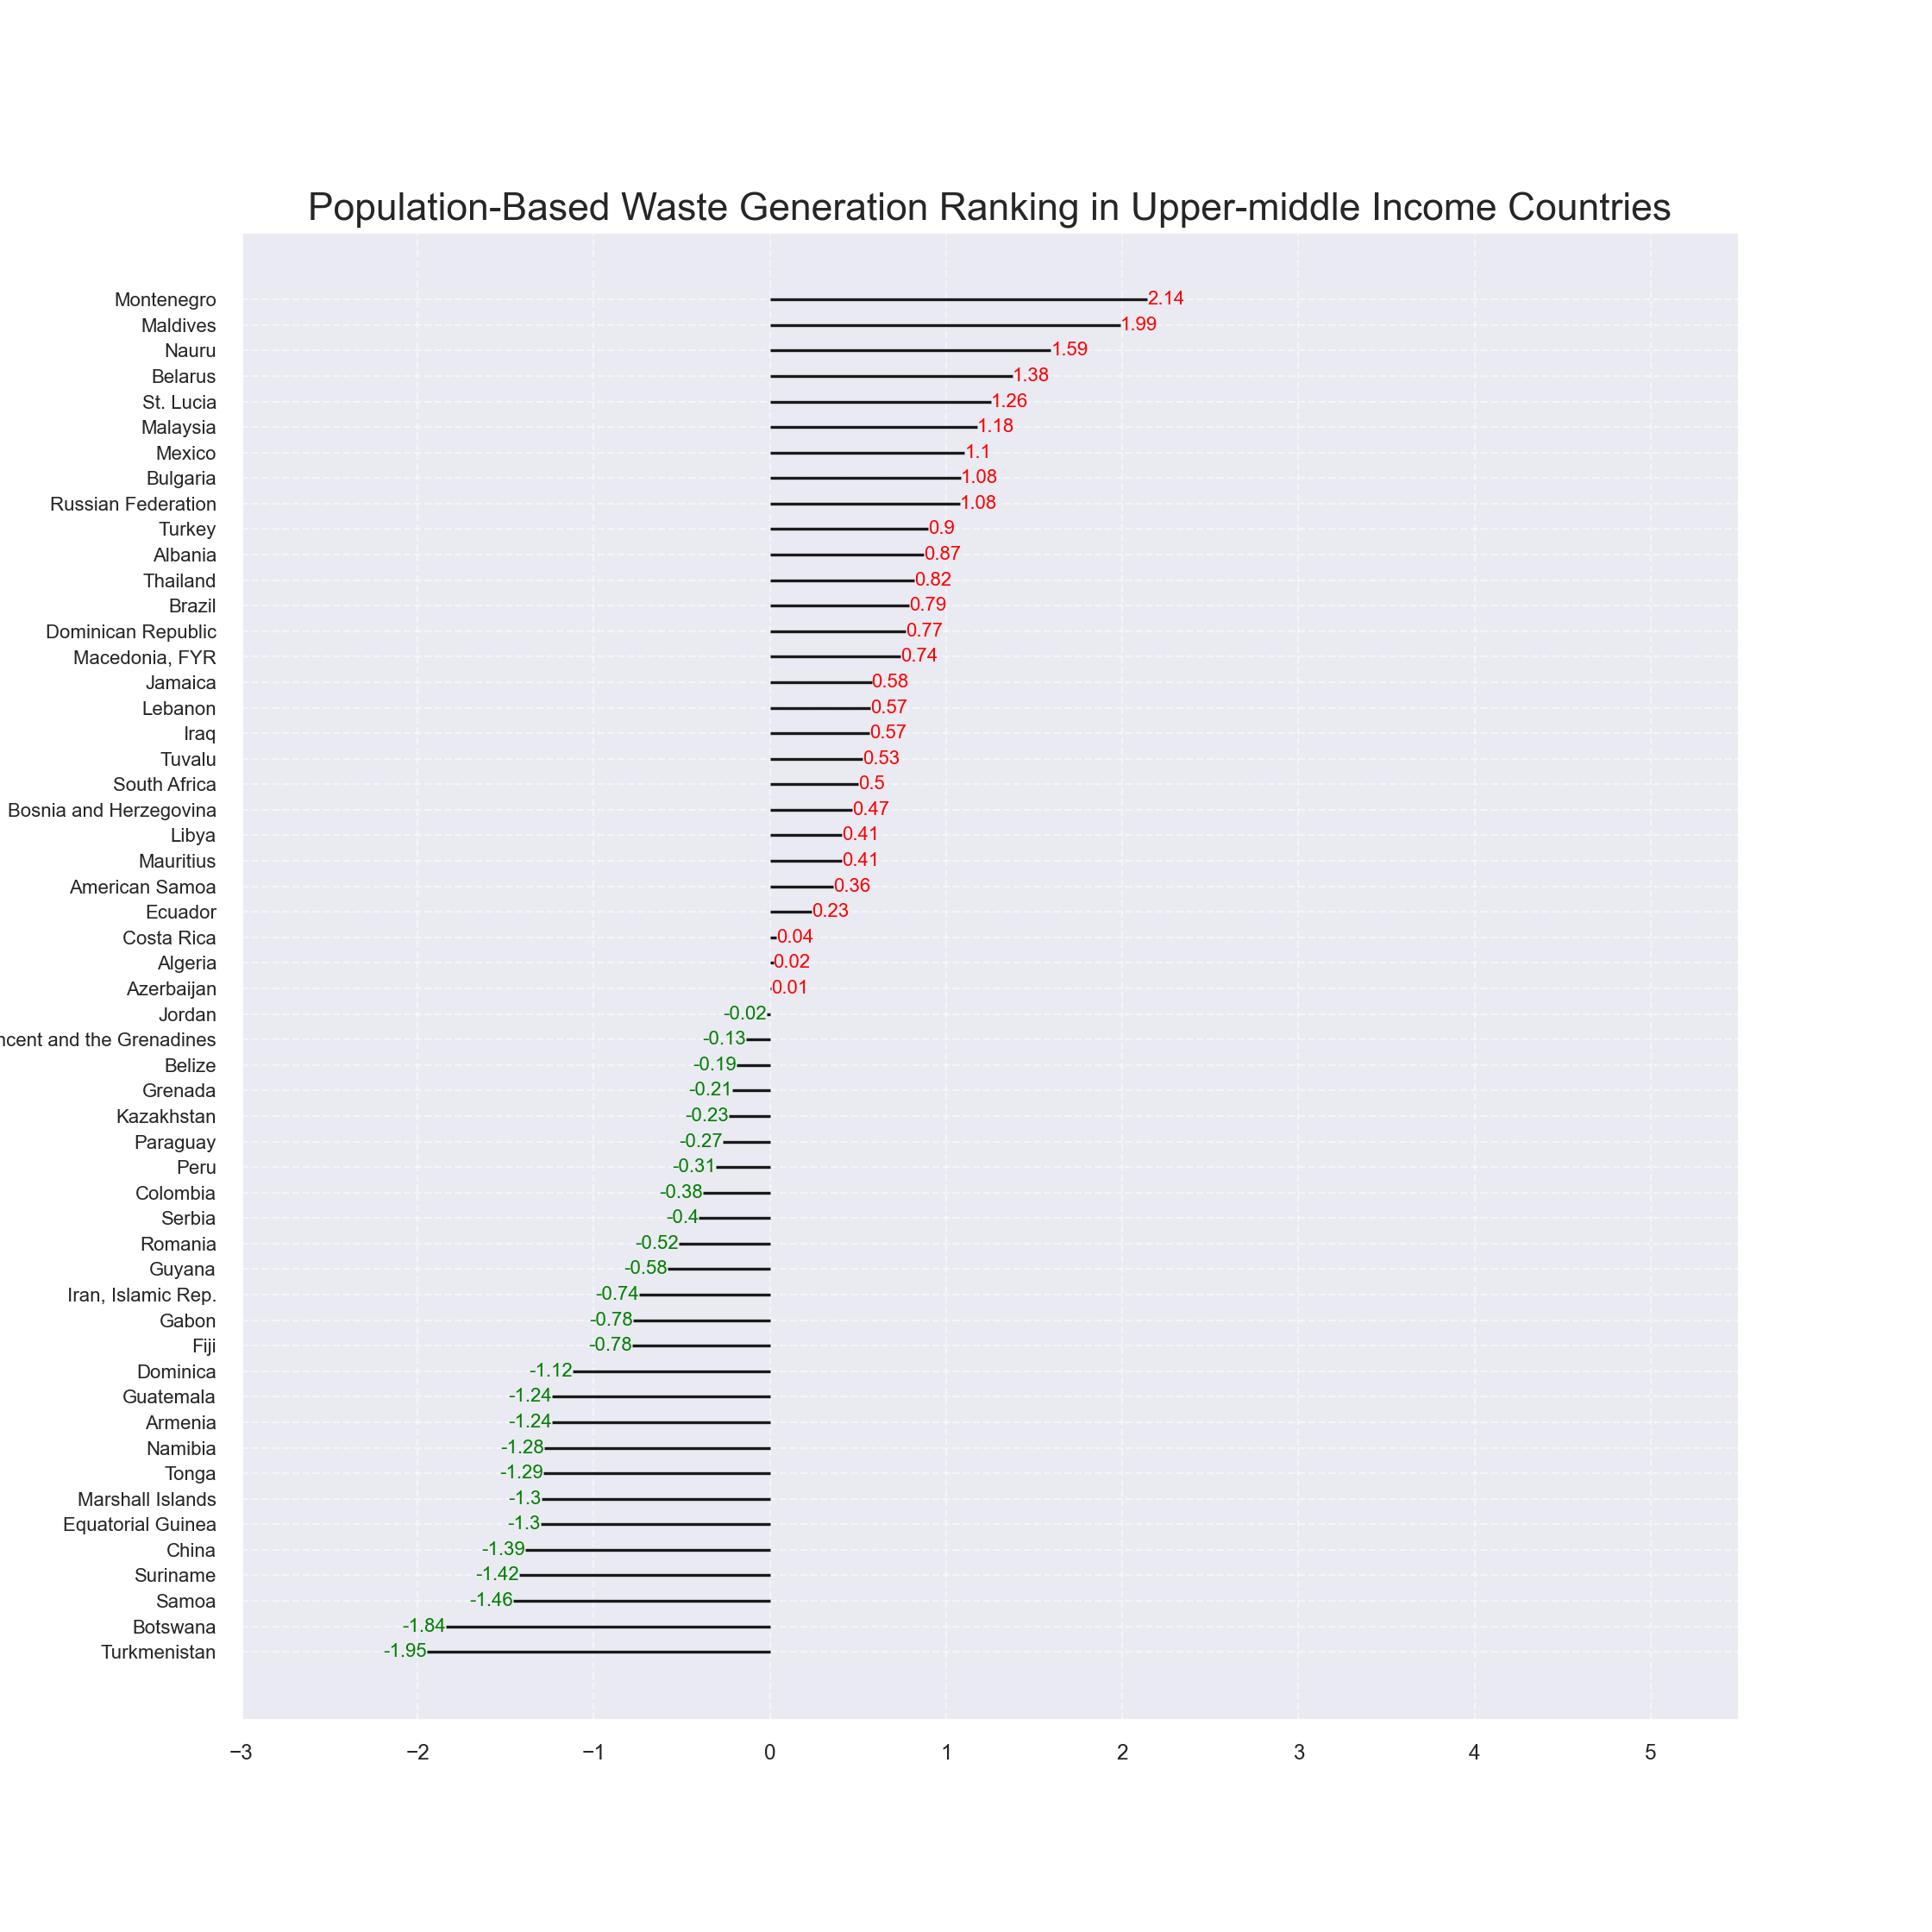

In [107]:
x = UMC_rank.loc[:, ['msw_per_day_per_person']]
UMC_rank['mpg_z'] = (x - x.mean())/x.std()
UMC_rank['colors'] = ['green' if x < 0.5 else 'red' for x in UMC_rank['mpg_z']]
UMC_rank.sort_values('mpg_z', inplace=True)
UMC_rank.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=UMC_rank.country_name, xmin=0, xmax=UMC_rank.mpg_z)
for x, y, tex in zip(UMC_rank.mpg_z, UMC_rank.index, UMC_rank.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'green' if x < 0 else 'red', 'size':10})
    

# Decorations    
plt.yticks(UMC_rank.country_name, fontsize=10)
plt.title('Population-Based Waste Generation Ranking in Upper-middle Income Countries', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-3.0, 5.5)
plt.show()

In [108]:
Treatment_HIC = df_world.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
#df1 = Treatment_LIC.sum(axis=0)
df_HIC= pd.DataFrame(Treatment_HIC)
df_HIC
i = df_HIC[(df_HIC.gdp == 0.000000e+00)].index
HIC_rank = df_HIC.drop(i)
HIC_rank


,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
country_name,,,,,,,
Andorra,HIC,3.319880e+09,82431.0,4.300000e+04,117.808219,0.521648,0.521648
United Arab Emirates,HIC,3.842225e+11,9269612.0,5.413453e+06,14831.379200,0.584000,0.584000
Argentina,HIC,4.475178e+11,42981515.0,1.791055e+07,49070.000000,0.416704,0.416704
Antigua and Barbuda,HIC,1.344374e+09,96777.0,3.058500e+04,83.794521,0.316036,0.316036
Australia,HIC,1.349305e+12,23789338.0,1.334500e+07,36561.643836,0.560966,0.560966
Austria,HIC,4.200405e+11,8633169.0,4.836000e+06,13249.315068,0.560165,0.560165
Belgium,HIC,5.151026e+11,11274196.0,4.708000e+06,12898.630137,0.417591,0.417591
Bahrain,HIC,3.176906e+10,1425171.0,9.519430e+05,2608.062930,0.667950,0.667950
"Bahamas, The",HIC,1.034380e+10,386838.0,2.640000e+05,723.287671,0.682456,0.682456


<IPython.core.display.Javascript object>


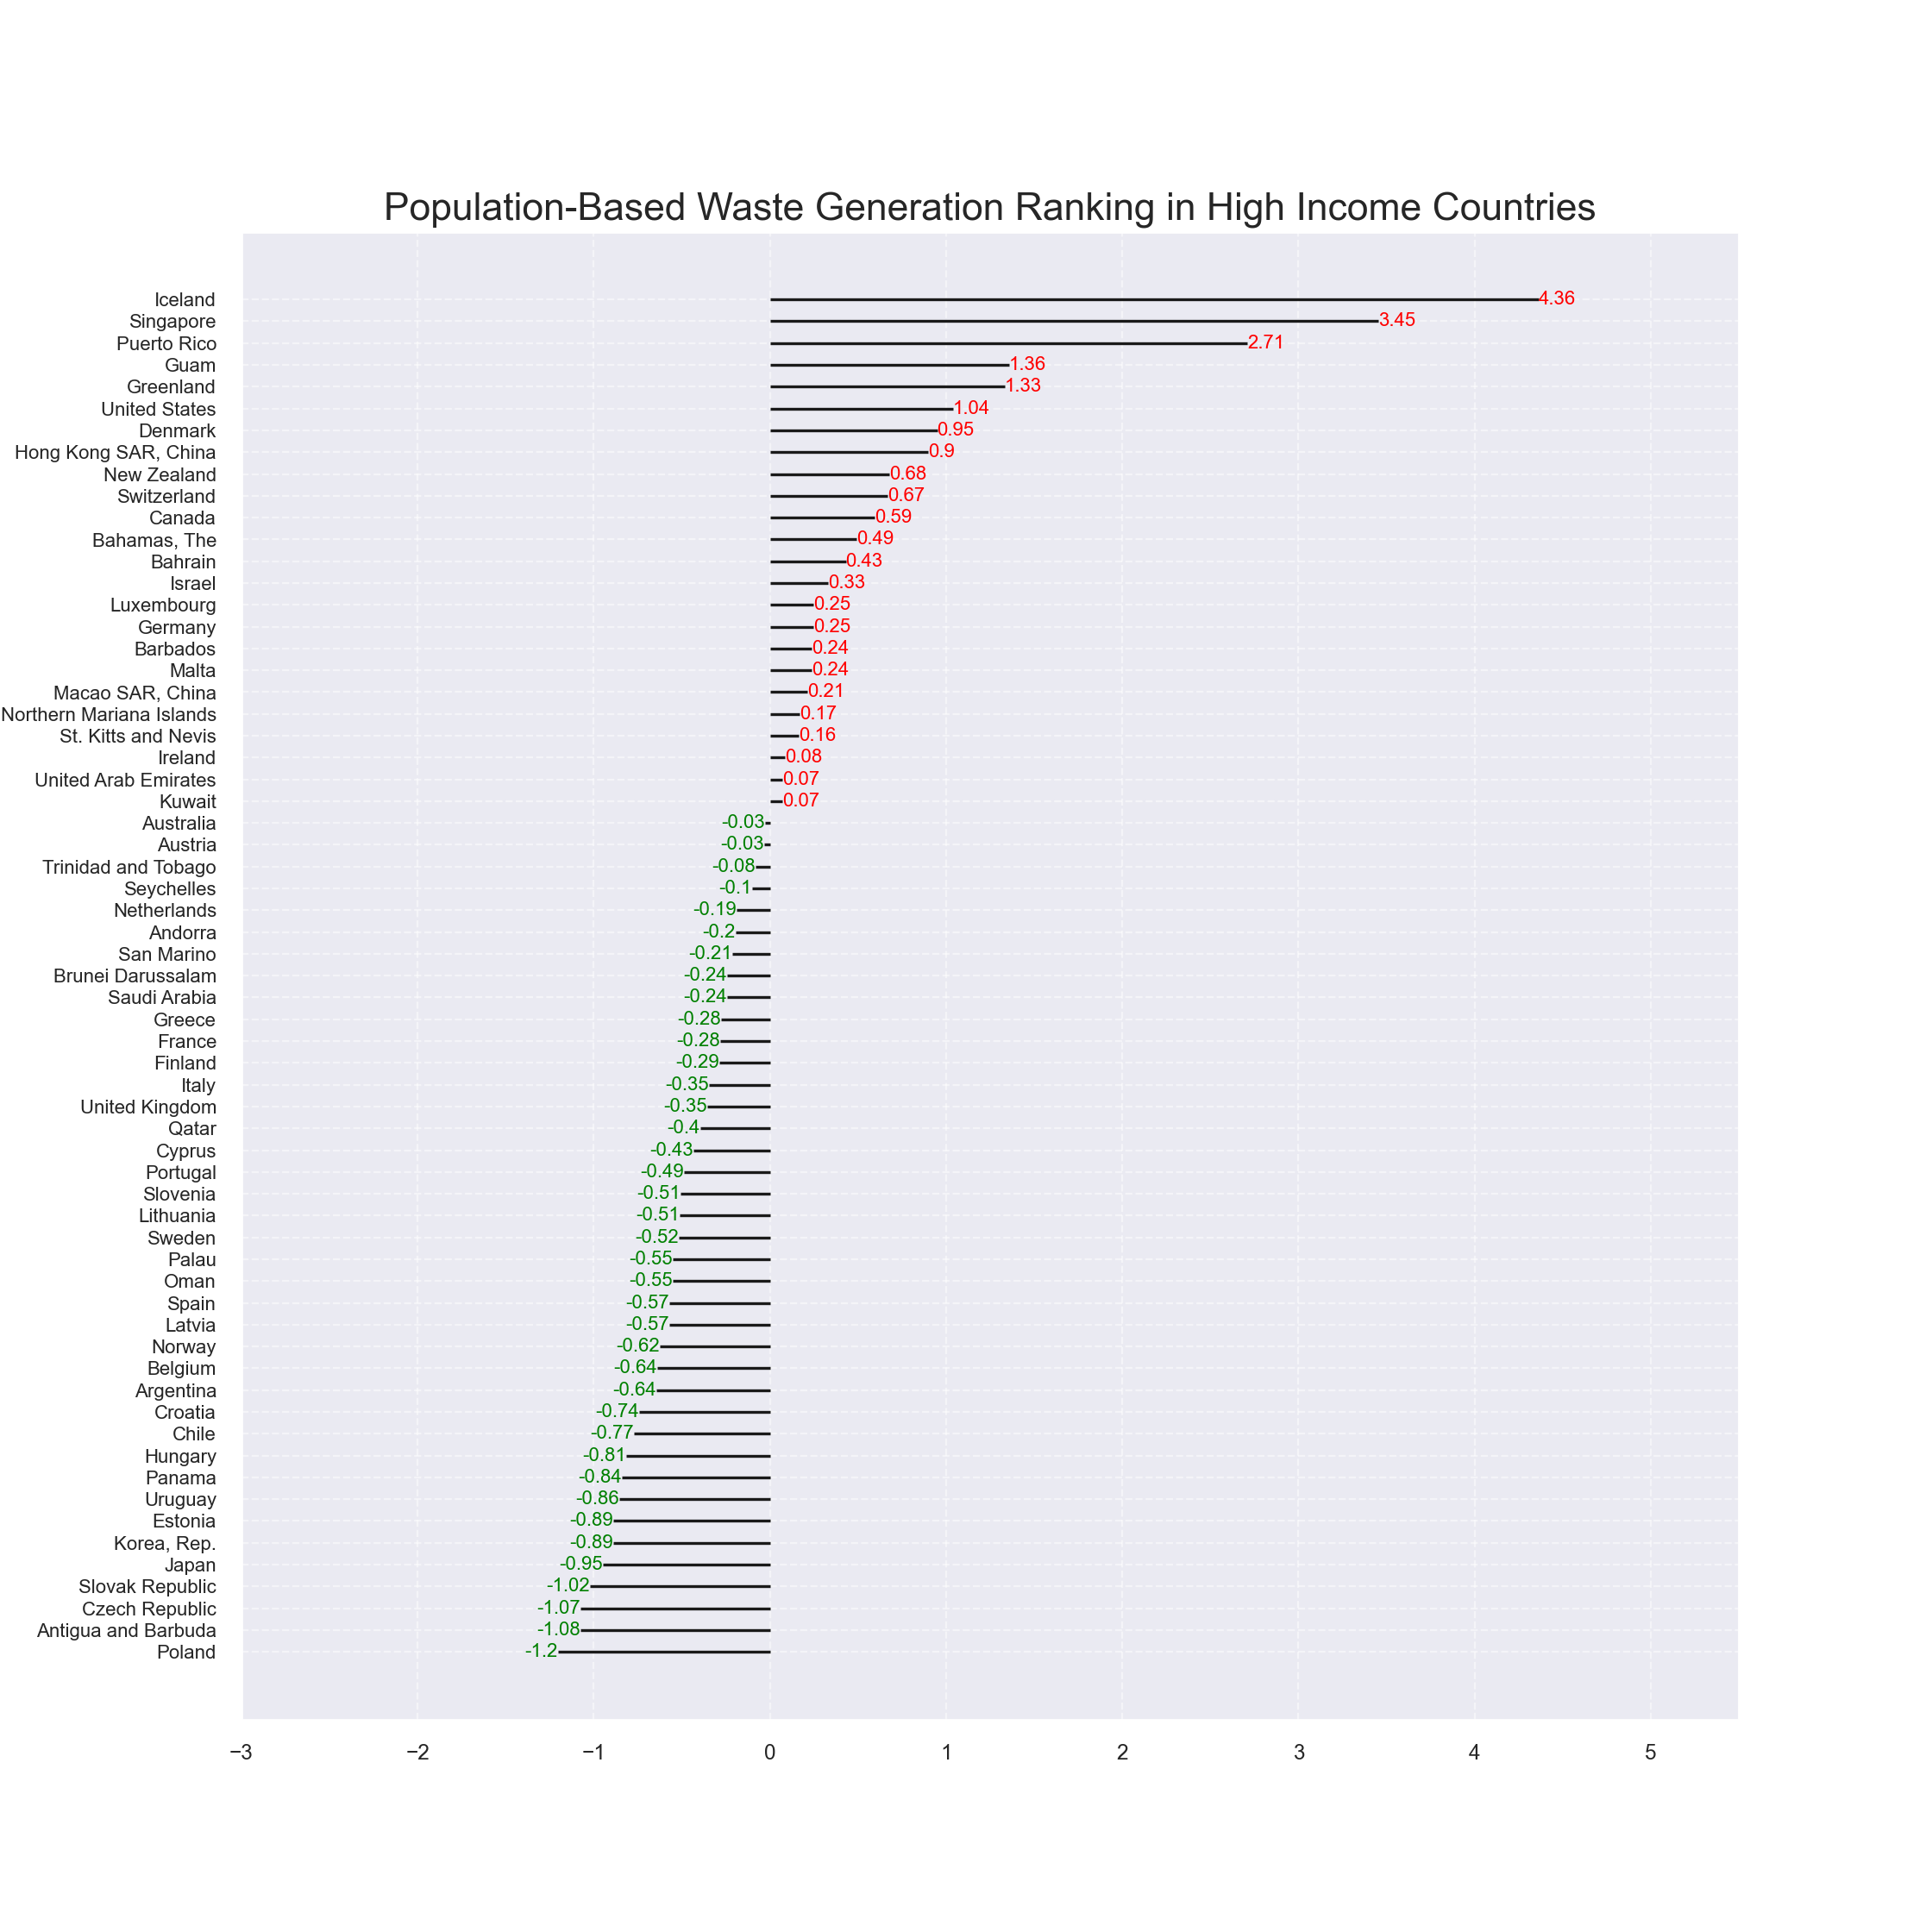

In [109]:
x = HIC_rank.loc[:, ['msw_per_day_per_person']]
HIC_rank['mpg_z'] = (x - x.mean())/x.std()
HIC_rank['colors'] = ['green' if x < 0.0 else 'red' for x in HIC_rank['mpg_z']]
HIC_rank.sort_values('mpg_z', inplace=True)
HIC_rank.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=HIC_rank.country_name, xmin=0, xmax=HIC_rank.mpg_z)
for x, y, tex in zip(HIC_rank.mpg_z, HIC_rank.index, HIC_rank.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'green' if x < 0 else 'red', 'size':10})
    

# Decorations    
plt.yticks(HIC_rank.country_name, fontsize=10)
plt.title('Population-Based Waste Generation Ranking in High Income Countries', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-3.0, 5.5)
plt.show()